# P3:  Plotting dual-polarisation data

In [2]:
import pyart 
import numpy as np # for working with data arrays 
import matplotlib.pyplot as plt # to make and customise plots
import cartopy.crs as ccrs # to produce maps
import glob # for accessing multiple files using wild cards (useful for finding and reading data files)
import os # for operating system dependent functionality such as manipulating file paths (useful for finding and reading data files)


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



As you have learnt in Lecture 3, dual-polarisation radar transmits and receives pulses in both a horizontal and vertical orientation. This gives us more variables to plot and use to identify features. In this practical we will build on the skills from practical 2 to plot and interpret dual-pol data. 

In [12]:
data_folder = '/home/jupyter-eeslb/iar/practical2/' #change this to your own directory!
radar_file = os.path.join(data_folder,'ncas-mobile-x-band-radar-1_lyneham_20230622-184423_vol_v1.0.0.nc')
radar = pyart.io.read(radar_file, delay_field_loading=True)

Let's have a look at the fields in this file. 

In [13]:
for key in radar.fields.keys():
    print('{}: {}'.format(key, radar.fields[key]['long_name']))

CCOR: clutter_correction_ratio_from_horizontal_polarization
CCORv: clutter_correction_ratio_from_vertical_polarization
KDP: specific_differential_phase_shift_derived_by_Rainbow_from_PhiDP
PhiDP: differential_phase_shift_filtered_by_Rainbow
RhoHV: co-polar_cross_correlation_coefficient
RhoHVu: unfiltered_co-polar_cross_correlation_coefficient
SNR: signal_to_noise_ratio_from_horizontal_polarization
SNRu: unfiltered_signal_to_noise_ratio_from_horizontal_polarization
SNRv: signal_to_noise_ratio_from_vertical_polarization
SNRvu: unfiltered_signal_to_noise_ratio_from_vertical_polarization
SQI: signal_quality_index_from_horizontal_polarization
SQIu: unfiltered_signal_quality_index_from_horizontal_polarization
SQIv: signal_quality_index_from_vertical_polarization
SQIvu: unfiltered_signal_quality_index_from_vertical_polarization
V: radial_velocity_from_horizontal_polarization
Vu: unfiltered_radial_velocity_from_horizontal_polarization
Vv: radial_velocity_from_vertical_polarization
Vvu: unfilter

What are the appropriate fields to plot?

In [14]:
fields = ['dBZ',
          'dBZv',
          'ZDR', 
          'RhoHV', 
          'PhiDP',
          'KDP']

Now make a plot with a subplot for each variable.

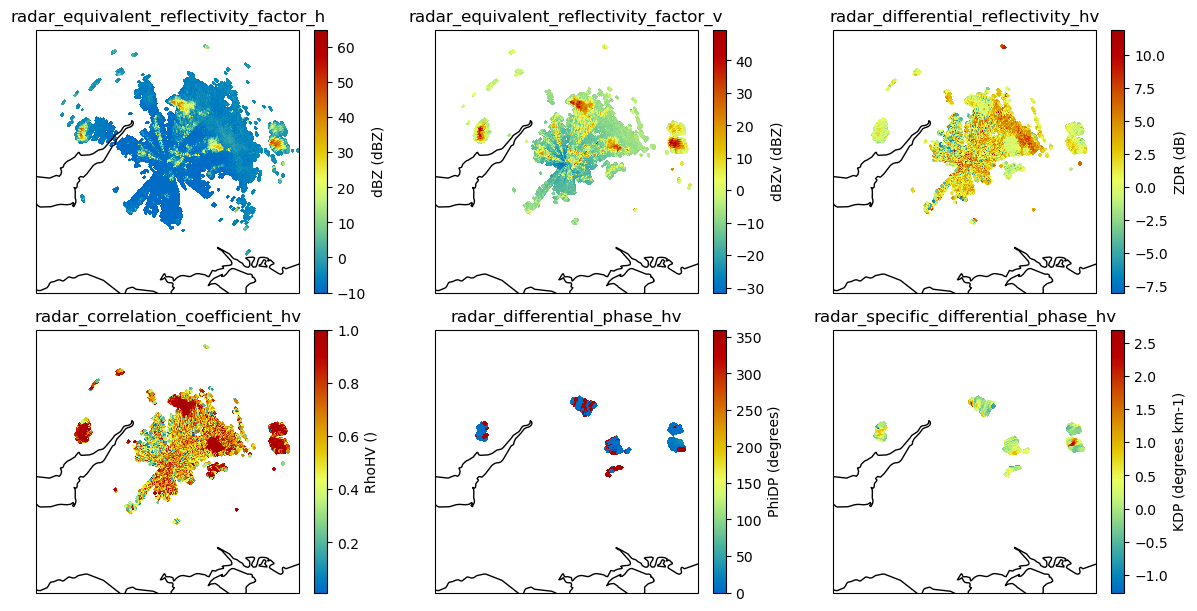

In [15]:
grid_projection = ccrs.AzimuthalEquidistant(central_longitude=radar.longitude['data'][0],
                                            central_latitude=radar.latitude['data'][0]
                                           )
#subplot rows and columns
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows,ncols, figsize = (12,6), 
                         subplot_kw={'projection':grid_projection}, 
                         constrained_layout= True
                        )

for ax, field in zip(axes.flatten(),fields):
    units = radar.fields[field]['units']
    display.plot_ppi_map(field,
                         ax=ax,
                         embellish = False,
                         title_flag=False,
                         colorbar_label = f'{field} ({units})',
                         cmap = 'pyart_HomeyerRainbow'
                        )
    
    ax.coastlines(resolution = '10m');
    ax.set_title(radar.fields[field]['proposed_standard_name'])